In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df = pd.concat([df_train, df_test])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.head()
#df.drop(['User_ID'], axis=1, inplace=True)
#df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [8]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [9]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [10]:
df['Gender'].unique()

array([0, 1])

In [11]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df['Age'] = df['Age'].map({'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '56+': 6})

In [14]:
df['Age'].unique()

array([ 0., nan,  2.,  4.,  5.,  3.,  1.])

In [15]:
df[~df['Age'].isin(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+', '56+'])]['Age'].unique()


array([ 0., nan,  2.,  4.,  5.,  3.,  1.])

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].mode()[0]).astype(int) #Fill in the missing values with -1 and convert to int

In [17]:
df['Age'].unique()

array([0, 2, 4, 5, 3, 1])

In [18]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,2,16,C,4+,0,8,NaN,NaN,7969.0


In [19]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,2,16,C,4+,0,8,NaN,NaN,7969.0


In [20]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [21]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [22]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [23]:
df['Product_Category_2'].mode()[0]

8.0

In [24]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [25]:
df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [26]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [27]:
df['Product_Category_3'].mode()[0]

16.0

In [28]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [29]:
df['Product_Category_3'].unique()

array([16., 14., 17.,  5.,  4., 15.,  8.,  9., 13.,  6., 12.,  3., 18.,
       11., 10.])

In [30]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [31]:
df['Purchase']=df['Purchase'].fillna(df['Purchase'].mode()[0])

In [32]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [33]:
#Lets convert object type to int type

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    783667 non-null  float64
dtypes: float64(3), int64(6), object(3)
memory usage: 77.7+ MB


In [38]:
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].replace('4+', '4').astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int64  
 3   Age                         783667 non-null  int64  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  int64  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    783667 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 77.7+ MB


<Axes: xlabel='Gender', ylabel='Purchase'>

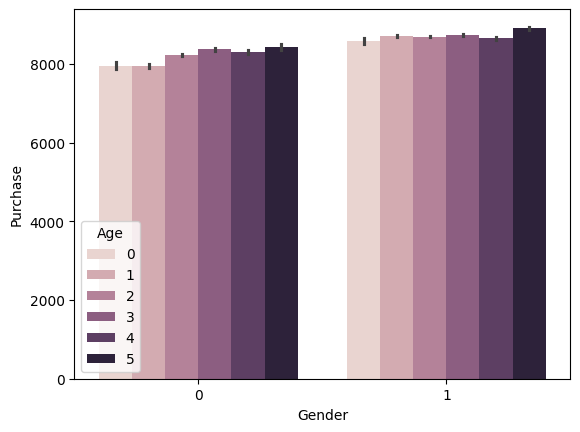

In [44]:
sns.barplot(x='Gender', y='Purchase', data=df, hue='Age')

<Axes: xlabel='Occupation', ylabel='Purchase'>

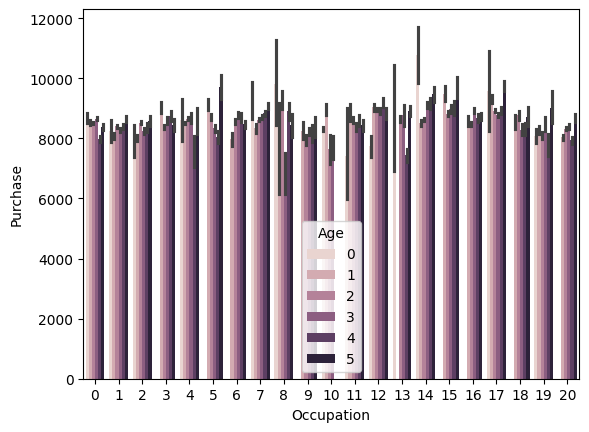

In [45]:
sns.barplot(x='Occupation', y='Purchase', data=df, hue='Age')

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

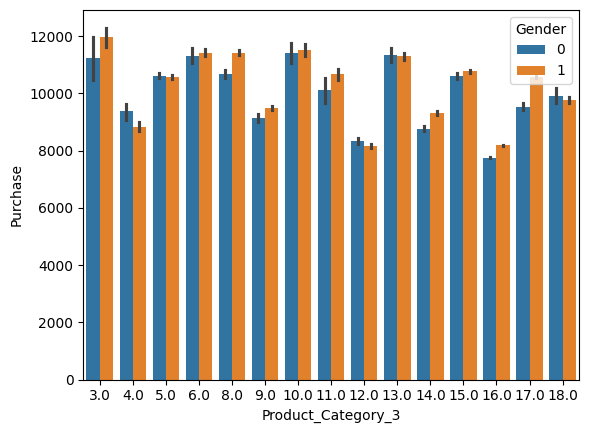

In [48]:
sns.barplot(x='Product_Category_3', y='Purchase', data=df, hue='Gender')

In [49]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370.0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422.0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057.0
4,1000002,P00285442,1,2,16,C,4,0,8,8.0,16.0,7969.0


In [52]:
df.drop(['Product_ID'], axis=1, inplace=True)

In [53]:
df.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,0,0,10,A,2,0,3,8.0,16.0,8370.0
1,1000001,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,0,0,10,A,2,0,12,8.0,16.0,1422.0
3,1000001,0,0,10,A,2,0,12,14.0,16.0,1057.0
4,1000002,1,2,16,C,4,0,8,8.0,16.0,7969.0


In [54]:
#FEATURE SCALING 

In [55]:
df.select_dtypes(include='number').columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'Purchase'],
      dtype='object')

In [58]:
columns_to_scale = ['Age', 'Occupation', 'Stay_In_Current_City_Years','Product_Category_1', 'Product_Category_2','Product_Category_3', 'Purchase']

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [60]:
df[columns_to_scale].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,783667.0,3.119012e-17,1.000001,-2.024880,-0.294746,-0.294746,0.570322,2.300456
Occupation,783667.0,-6.644222e-17,1.000001,-1.238738,-0.932093,-0.165481,0.907776,1.827711
Stay_In_Current_City_Years,783667.0,-2.365553e-17,1.000001,-1.441855,-0.665933,0.109989,0.885911,1.661833
Product_Category_1,783667.0,4.591476e-17,1.000001,-1.125843,-1.125843,-0.094425,0.679138,3.773391
Product_Category_2,783667.0,-9.770941e-17,1.000001,-1.689102,-0.294215,-0.294215,1.100672,2.030597
Product_Category_3,783667.0,1.908854e-16,1.000001,-4.374234,0.368924,0.368924,0.368924,1.098640
Purchase,783667.0,-1.392675e-16,1.000001,-1.980387,-0.368454,-0.364992,0.308032,3.547133
